In [1]:
# import the necessary packages
import numpy as np
import cv2
import glob
import pandas as pd
from matplotlib import pyplot as plt

class ColorDescriptor:
    def __init__(self, bins):
        # store the number of bins for the 3D histogram
        self.bins = bins

    def describe(self, image):
        # convert the image to the HSV color space and initialize
        # the features used to quantify the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        features = []

    # grab the dimensions and compute the center of the image
        (h, w) = image.shape[:2]
        (cX, cY) = (int(w * 0.5), int(h * 0.5))
        # divide the image into four rectangles/segments (top-left,
        # top-right, bottom-right, bottom-left)
        segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h),(0, cX, cY, h)]

        # construct an elliptical mask representing the center of the
        # image
        (axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
        ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
        cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)

        # loop over the segments
        for (startX, endX, startY, endY) in segments:
            # construct a mask for each corner of the image, subtracting
            # the elliptical center from it
            cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
            cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
            cornerMask = cv2.subtract(cornerMask, ellipMask)
            # extract a color histogram from the image, then update the
            # feature vector
            hist = self.histogram(image, cornerMask)
            features.extend(hist)

        # extract a color histogram from the elliptical region and
        # update the feature vector
        hist = self.histogram(image, ellipMask)
        features.extend(hist)

        # return the feature vector
        return features

    def histogram(self, image, mask):
        # extract a 3D color histogram from the masked region of the
        # image, using the supplied number of bins per channel
        hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins,[0, 180, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        return hist

In [100]:
# initialize the color descriptor
cd = ColorDescriptor((8, 12, 3))

path ='dataset'
filenames = glob.glob(path + "/*.png")
dfs = []
for imagePath in filenames:
    imageID = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
     
    # describe the image
    features = cd.describe(image)
 
    # write the features to file
    features = [str(f) for f in features]
    feat = (imageID,",".join(features))
    dfs.append(feat)
df = pd.DataFrame(dfs)
print(df)

              0                                                  1
0    119605.png  0.018604212,0.07996547,0.05320152,0.027416732,...
1    105701.png  0.017693212,0.0,0.0,0.048230387,0.00052424334,...
2    124101.png  0.0,0.0,0.0040745996,0.0,0.0,0.0,0.0,0.0,0.0,0...
3    122002.png  0.0015008014,0.013132012,0.009755209,0.0032517...
4    107702.png  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....
..          ...                                                ...
800  115702.png  0.00044634612,0.0029012498,0.00011158653,0.001...
801  108106.png  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....
802  117301.png  0.0,0.00012136047,0.04599562,0.0,0.0,0.0,0.0,0...
803  101801.png  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....
804  128801.png  0.0,0.0,0.012280308,0.0,0.0,0.0,0.0,0.0,0.0,0....

[805 rows x 2 columns]


In [5]:
df1 = df[1].str.split(",",expand = True)

In [6]:
df1

0              1              2             3              4     \
0      0.018604212     0.07996547     0.05320152   0.027416732     0.40766072   
1      0.017693212            0.0            0.0   0.048230387  0.00052424334   
2              0.0            0.0   0.0040745996           0.0            0.0   
3     0.0015008014    0.013132012    0.009755209  0.0032517365    0.041397106   
4              0.0            0.0            0.0           0.0            0.0   
..             ...            ...            ...           ...            ...   
800  0.00044634612   0.0029012498  0.00011158653  0.0014506249      0.0737587   
801            0.0            0.0            0.0           0.0            0.0   
802            0.0  0.00012136047     0.04599562           0.0            0.0   
803            0.0            0.0            0.0           0.0            0.0   
804            0.0            0.0    0.012280308           0.0            0.0   

            5             6           7           8             9     ...  \
0     0.22618805   0.033618137   0.3097438   0.0851877   0.026437564  ...   
1            0.0    0.03132354  0.00314546         0.0  0.0061598592  ...   
2            0.0           0.0         0.0         0.0           0.0  ...   
3    0.040646706  0.0043773376   0.0760406  0.05140245   0.005753072  ...   
4            0.0           0.0         0.0         0.0           0.0  ...   
..           ...           ...         ...         ...           ...  ...   
800  0.017295912  0.0055793263  0.20487288   0.0778874   0.008368989  ...   
801          0.0           0.0         0.0         0.0           0.0  ...   
802          0.0           0.0         0.0         0.0           0.0  ...   
803          0.0           0.0         0.0         0.0           0.0  ...   
804          0.0           0.0         0.0         0.0           0.0  ...   

              1430            1431           1432 1433 1434           1435  \
0              0.0   0.00016753297            0.0  0.0  0.0  8.3766485e-05   
1              0.0             0.0            0.0  0.0  0.0            0.0   
2              0.0  0.000114549184   7.636612e-05  0.0  0.0   3.818306e-05   
3    0.00010724131   0.00010724131  0.00010724131  0.0  0.0            0.0   
4              0.0             0.0            0.0  0.0  0.0            0.0   
..             ...             ...            ...  ...  ...            ...   
800            0.0             0.0            0.0  0.0  0.0            0.0   
801            0.0             0.0            0.0  0.0  0.0            0.0   
802            0.0             0.0            0.0  0.0  0.0            0.0   
803            0.0             0.0            0.0  0.0  0.0            0.0   
804            0.0             0.0            0.0  0.0  0.0            0.0   

    1436          1437            1438 1439  
0    0.0           0.0             0.0  0.0  
1    0.0           0.0             0.0  0.0  
2    0.0  3.818306e-05  0.000114549184  0.0  
3    0.0           0.0             0.0  0.0  
4    0.0           0.0             0.0  0.0  
..   ...           ...             ...  ...  
800  0.0           0.0             0.0  0.0  
801  0.0           0.0             0.0  0.0  
802  0.0           0.0             0.0  0.0  
803  0.0           0.0             0.0  0.0  
804  0.0           0.0             0.0  0.0  

[805 rows x 1440 columns]

In [7]:
del df[1]

In [8]:
for i in range(1,1441):
    df[i] = df1[i-1]

In [9]:
df

0              1              2              3             4     \
0    119605.png    0.018604212     0.07996547     0.05320152   0.027416732   
1    105701.png    0.017693212            0.0            0.0   0.048230387   
2    124101.png            0.0            0.0   0.0040745996           0.0   
3    122002.png   0.0015008014    0.013132012    0.009755209  0.0032517365   
4    107702.png            0.0            0.0            0.0           0.0   
..          ...            ...            ...            ...           ...   
800  115702.png  0.00044634612   0.0029012498  0.00011158653  0.0014506249   
801  108106.png            0.0            0.0            0.0           0.0   
802  117301.png            0.0  0.00012136047     0.04599562           0.0   
803  101801.png            0.0            0.0            0.0           0.0   
804  128801.png            0.0            0.0    0.012280308           0.0   

              5            6             7           8           9     ...  \
0       0.40766072   0.22618805   0.033618137   0.3097438   0.0851877  ...   
1    0.00052424334          0.0    0.03132354  0.00314546         0.0  ...   
2              0.0          0.0           0.0         0.0         0.0  ...   
3      0.041397106  0.040646706  0.0043773376   0.0760406  0.05140245  ...   
4              0.0          0.0           0.0         0.0         0.0  ...   
..             ...          ...           ...         ...         ...  ...   
800      0.0737587  0.017295912  0.0055793263  0.20487288   0.0778874  ...   
801            0.0          0.0           0.0         0.0         0.0  ...   
802            0.0          0.0           0.0         0.0         0.0  ...   
803            0.0          0.0           0.0         0.0         0.0  ...   
804            0.0          0.0           0.0         0.0         0.0  ...   

              1431            1432           1433 1434 1435           1436  \
0              0.0   0.00016753297            0.0  0.0  0.0  8.3766485e-05   
1              0.0             0.0            0.0  0.0  0.0            0.0   
2              0.0  0.000114549184   7.636612e-05  0.0  0.0   3.818306e-05   
3    0.00010724131   0.00010724131  0.00010724131  0.0  0.0            0.0   
4              0.0             0.0            0.0  0.0  0.0            0.0   
..             ...             ...            ...  ...  ...            ...   
800            0.0             0.0            0.0  0.0  0.0            0.0   
801            0.0             0.0            0.0  0.0  0.0            0.0   
802            0.0             0.0            0.0  0.0  0.0            0.0   
803            0.0             0.0            0.0  0.0  0.0            0.0   
804            0.0             0.0            0.0  0.0  0.0            0.0   

    1437          1438            1439 1440  
0    0.0           0.0             0.0  0.0  
1    0.0           0.0             0.0  0.0  
2    0.0  3.818306e-05  0.000114549184  0.0  
3    0.0           0.0             0.0  0.0  
4    0.0           0.0             0.0  0.0  
..   ...           ...             ...  ...  
800  0.0           0.0             0.0  0.0  
801  0.0           0.0             0.0  0.0  
802  0.0           0.0             0.0  0.0  
803  0.0           0.0             0.0  0.0  
804  0.0           0.0             0.0  0.0  

[805 rows x 1441 columns]

In [10]:
df.to_csv('index.csv',index = False)

In [11]:
df1[0:1]

0           1           2            3           4           5     \
0  0.018604212  0.07996547  0.05320152  0.027416732  0.40766072  0.22618805   

          6          7          8            9     ... 1430           1431  \
0  0.033618137  0.3097438  0.0851877  0.026437564  ...  0.0  0.00016753297   

  1432 1433 1434           1435 1436 1437 1438 1439  
0  0.0  0.0  0.0  8.3766485e-05  0.0  0.0  0.0  0.0  

[1 rows x 1440 columns]

In [157]:
tar_img = cv2.imread("/home/subarna/Documents/ml_notebooks/dataset/"+input())
tar_img

100000.png


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 244, 235],
        [253, 244, 235],
        [252, 244, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 244, 235],
        [253, 244, 235],
        [252, 245, 235]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 245, 234],
        [253, 245, 234],
        [253, 245, 236]],

       ...,

       [[ 18,  26,  26],
        [ 17,  31,  41],
        [ 19,  42,  47],
        ...,
        [ 33,  79,  79],
        [ 42,  59,  69],
        [ 26,  34,  44]],

       [[ 37,  50,  44],
        [ 27,  26,  27],
        [ 18,  27,  25],
        ...,
        [ 20,  81,  86],
        [ 29,  83, 108],
        [ 21,  41,  55]],

       [[ 47,  79,  80],
        [ 44,  84,  79],
        [ 41,  86,  53],
        ...,
        [  9,  36,  39],
        [ 25,  52,  75],
        [ 34,  64,  88]]

In [158]:
target_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# describe the image
features = cd.describe(target_img)

In [160]:
features

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011644753,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [161]:
df_feat = pd.DataFrame(features)

In [162]:
df_feat

0
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
1435  0.013212
1436  0.095936
1437  0.012106
1438  0.014709
1439  0.588110

[1440 rows x 1 columns]

In [163]:
df_feat  = df_feat.T

In [164]:
df_feat

0     1     2     3     4     5     6     7     8     9     ...  1430  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       1431      1432  1433      1434      1435      1436      1437      1438  \
0  0.012366  0.002603   0.0  0.021999  0.013212  0.095936  0.012106  0.014709   

      1439  
0  0.58811  

[1 rows x 1440 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Columns: 1441 entries, 0 to 1440
dtypes: object(1441)
memory usage: 8.9+ MB


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Columns: 1440 entries, 0 to 1439
dtypes: float64(1440)
memory usage: 8.8 MB


In [53]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 1440 entries, 0 to 1439
dtypes: float64(1440)
memory usage: 11.4 KB


In [46]:
df1 = df1.astype(float)
tar = tar.astype(float)

In [80]:
#%time
eps = 1e-10
dfs = []
for j in range(0,805):
    d = 0.5 * np.sum([((float(df1[j:j+1][i]) - float(df_feat[i])) ** 2) / (float(df1[j:j+1][i]) + float(df_feat[i]) + eps)
        for i in range(0,1440)])
    print(d)
    dfs.append(d)

0.0
13.269716834362782
17.00767511164923
12.095050648372155
16.547707732491247
11.837941083951812
13.052725820590169
16.22944877075397
13.546950173604502
17.057208829627477
8.832707060397109
12.387126906583838
15.080205849474845
15.712681777954923
17.94387782505754
16.697366010277882
15.754364763259343
16.415991182001886
21.340522223703758
15.044186783857633
14.675250029000061
12.261409620045438
16.105801941040646
16.0666355275768
15.112403511420744
18.5991890623623
11.870296463556416
17.65840401498493
9.770482024418548
16.80131376199113
15.509626123760219
12.312022163395499
14.251541084319335
17.101121904115985
15.028155702654932
15.171572781904445
16.025650798339587
16.50939477623794
16.99567835649674
14.006097614960886
15.210043234321999
14.177845390901634
15.488762016154611
17.392267811012054
15.856098293331957
19.280131370621483
9.742743207522743
17.170449238952962
19.44914359682725
15.22500298970074
15.835859061981571
16.19191630684264
16.159945533154833
14.30710018962456
16.9354

12.767485849924162
12.455330128162217
14.275346157552429
12.595821302351226
14.029293705921742
18.251111211212887
14.607952387379502
14.967217252747552
16.980074214904462
12.611526578927915
15.865174240058979
14.087674774159677
15.595790075929385
14.195777804539734
14.304310207944958
10.216843577784282
16.658609554179165
16.774488172752342
12.808832190559436
11.76567786379718
15.079623113492573
13.242303313546609
16.442890102351697
12.854735679782156
10.277842669890237
16.00252581889639
12.329687032257421
15.709568900013725
14.660787093451095
11.776955156744084
18.49589355765694
18.680242151836236
12.327308257502786
13.012015069793584
19.37680395831037
14.083422389033416
16.252051818732305
15.319673285689063
14.792190022760245
16.155083554962882
17.362148508683916
12.825493997898056
12.428732094415674
13.529376935502102
13.629348157703106
14.325601197067552
14.20994370946395
15.614496917081013
13.884570153917217
12.005480310987572
17.201432570491157
12.076732178422823
15.38077766710669

In [81]:
dfs

[0.0,
 13.269716834362782,
 17.00767511164923,
 12.095050648372155,
 16.547707732491247,
 11.837941083951812,
 13.052725820590169,
 16.22944877075397,
 13.546950173604502,
 17.057208829627477,
 8.832707060397109,
 12.387126906583838,
 15.080205849474845,
 15.712681777954923,
 17.94387782505754,
 16.697366010277882,
 15.754364763259343,
 16.415991182001886,
 21.340522223703758,
 15.044186783857633,
 14.675250029000061,
 12.261409620045438,
 16.105801941040646,
 16.0666355275768,
 15.112403511420744,
 18.5991890623623,
 11.870296463556416,
 17.65840401498493,
 9.770482024418548,
 16.80131376199113,
 15.509626123760219,
 12.312022163395499,
 14.251541084319335,
 17.101121904115985,
 15.028155702654932,
 15.171572781904445,
 16.025650798339587,
 16.50939477623794,
 16.99567835649674,
 14.006097614960886,
 15.210043234321999,
 14.177845390901634,
 15.488762016154611,
 17.392267811012054,
 15.856098293331957,
 19.280131370621483,
 9.742743207522743,
 17.170449238952962,
 19.44914359682725,
 

In [82]:
data = pd.DataFrame(dfs)

In [90]:
data.to_csv("out.csv",index = True)

In [101]:
df[0]

0      119605.png
1      105701.png
2      124101.png
3      122002.png
4      107702.png
          ...    
800    115702.png
801    108106.png
802    117301.png
803    101801.png
804    128801.png
Name: 0, Length: 805, dtype: object

In [89]:
data

0
0     0.000000
1    13.269717
2    17.007675
3    12.095051
4    16.547708
..         ...
800   9.411418
801  16.190578
802  16.649342
803  15.688318
804  12.747736

[805 rows x 1 columns]

In [103]:
df[1] = data

In [104]:
df

0          1
0    119605.png   0.000000
1    105701.png  13.269717
2    124101.png  17.007675
3    122002.png  12.095051
4    107702.png  16.547708
..          ...        ...
800  115702.png   9.411418
801  108106.png  16.190578
802  117301.png  16.649342
803  101801.png  15.688318
804  128801.png  12.747736

[805 rows x 2 columns]

In [105]:
df.to_csv("output.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 2 columns):
0    805 non-null object
1    805 non-null float64
dtypes: float64(1), object(1)
memory usage: 12.7+ KB


In [110]:
df[1]

0       0.000000
1      13.269717
2      17.007675
3      12.095051
4      16.547708
         ...    
800     9.411418
801    16.190578
802    16.649342
803    15.688318
804    12.747736
Name: 1, Length: 805, dtype: float64

In [111]:
df.sort_values(1,ascending = True,inplace = True)

In [112]:
df

0          1
0    119605.png   0.000000
96   119603.png   6.673082
360  119100.png   8.347659
767  119600.png   8.408716
247  119201.png   8.830159
..          ...        ...
302  106903.png  22.010400
638  100200.png  22.107320
798  105600.png  22.432102
741  106801.png  23.209965
349  106800.png  23.337619

[805 rows x 2 columns]

In [127]:
fd = df.head(10)

In [128]:
fd

0         1
0    119605.png  0.000000
96   119603.png  6.673082
360  119100.png  8.347659
767  119600.png  8.408716
247  119201.png  8.830159
10   105801.png  8.832707
327  119200.png  9.081041
316  118100.png  9.137066
800  115702.png  9.411418
306  114703.png  9.550346

In [129]:
a = fd[0].values.tolist()

In [130]:
a

['119605.png',
 '119603.png',
 '119100.png',
 '119600.png',
 '119201.png',
 '105801.png',
 '119200.png',
 '118100.png',
 '115702.png',
 '114703.png']

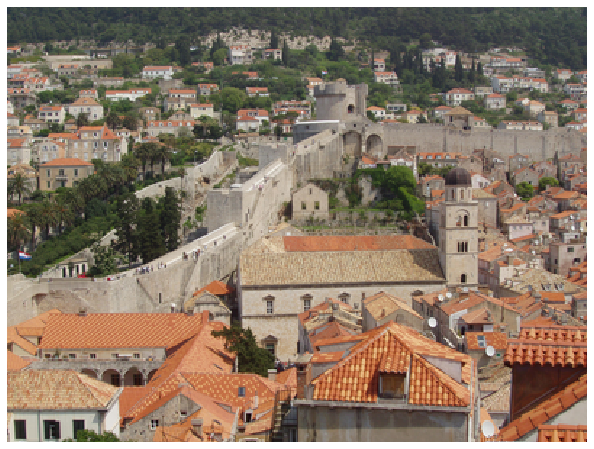

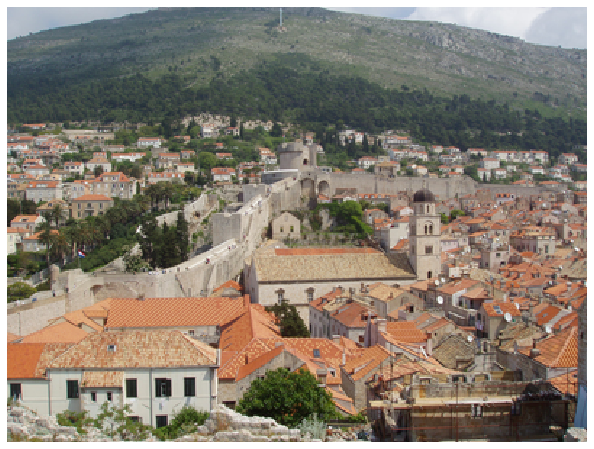

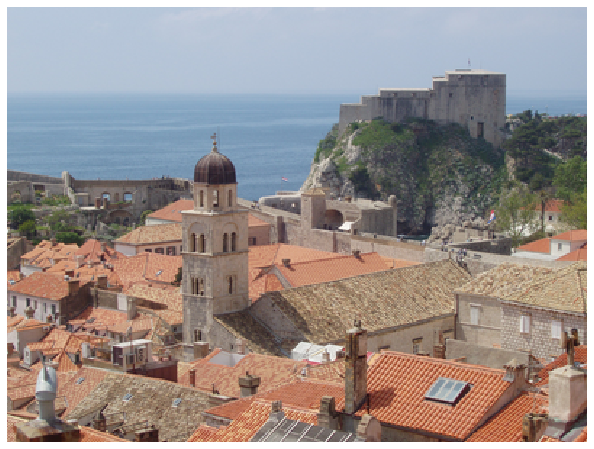

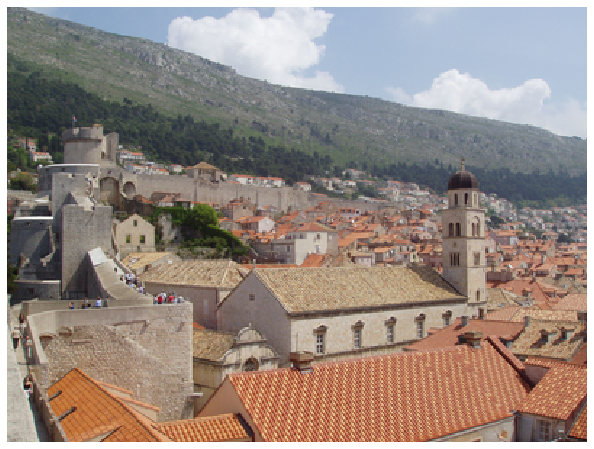

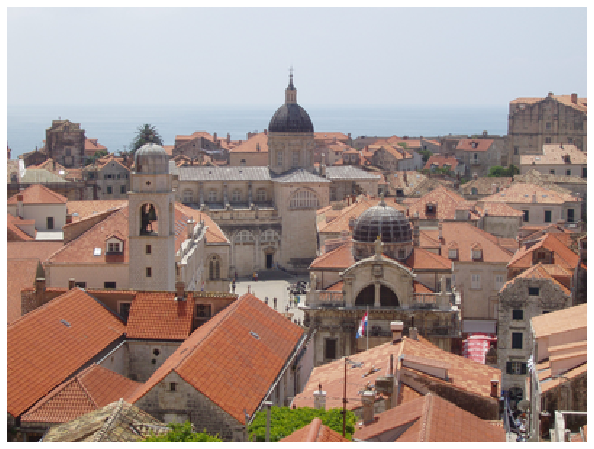

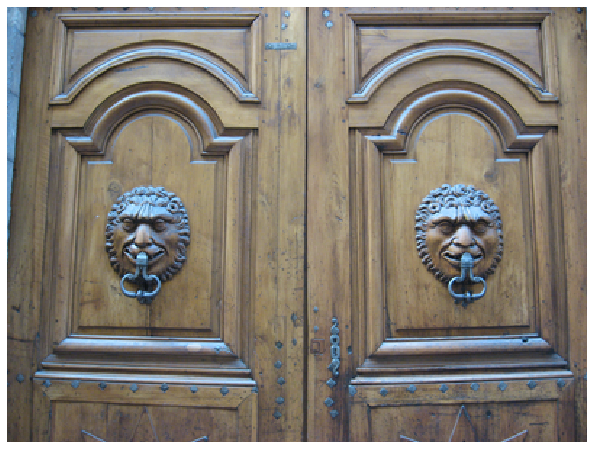

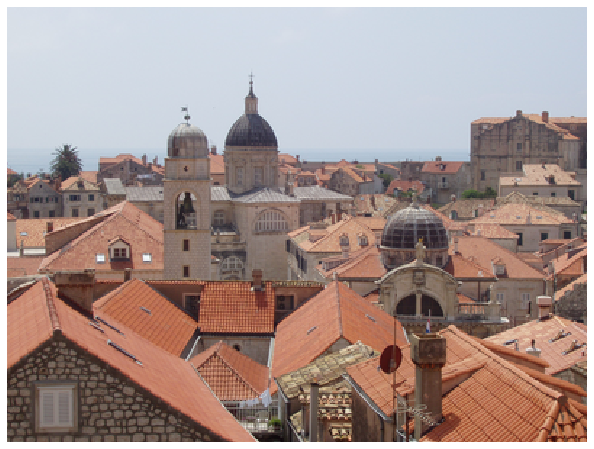

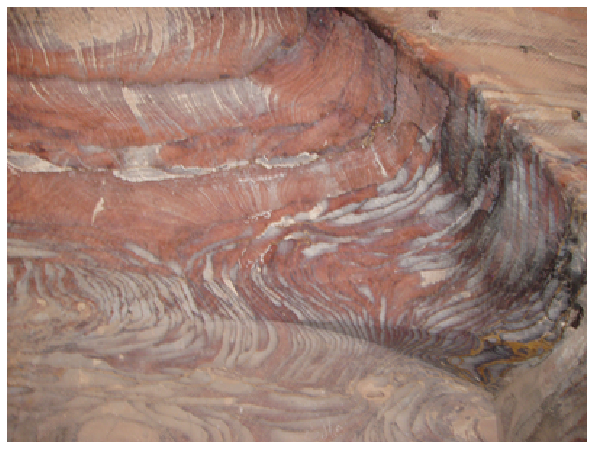

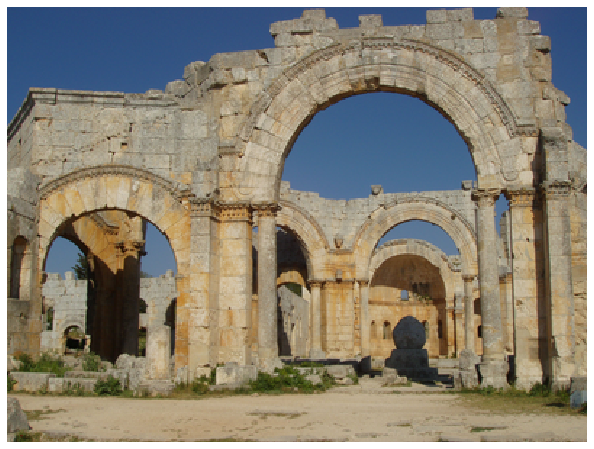

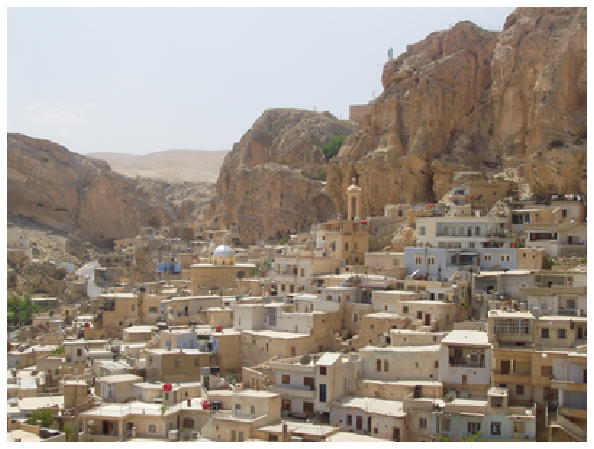

In [156]:
for i in range(0,10):
    img= cv2.imread("dataset/"+str(a[i]))
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20,8))
    plt.axis("off")
    plt.imshow(img)
    plt.savefig("want"+str(i))